#  Starbucks Capstone Project

**Introduction**

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. Not all users receive the same offer.

Here I will be analyzing this simulated customer dataset provided by Starbucks. We will try to answer few business questions as mentioned below

**Business Questions:**
*    Which group of people are most responsive to each type of offer?
*    Which is the best offer to send to people based on person's demographics?
*    Can we predict the success of an offer based on person's demographics?    

**Solution:**
* For answering 1st question we will do data analysis using different functions with pandas library
* For answering 2nd question we would build a statistical model which would find the best offer to send given any of the 3 demographics of a person like age, gender or income. For evaluating performance of this model we need to conduct an experiment and evaluated based on Incremental Response Rate
* For answering 3rd question we will build a machine learning model which will predict the success of an offer, given person's demographics. For this we will use RandomForest Classifier. As our target here would be binary, we will use accuracy score as our evaluation metric.

**Project Organisation:**

**Section 1: Exploratory Data Analysis**
*    Part 1: Exploring Portfolio Dataset
*    Part 2: Exploring Profile Dataset
*    Part 3: Exploring Transcript Dataset

**Section 2: Preprocessing and merging above datasets**
*    Part 1: Preprocessing Portfolio Dataset
*    Part 2: Preprocessing Profile Dataset
*    Part 3: Preprocessing Transcript Dataset
*    Part 4: Transform pipeline
    
**Section 3: Analysis**
*    Part 1: Which group of people are most responsive to each type of offer?        

**Section 4: Modeling**
*    Part 1: Statistical Model
*    Part 2: Machine Learning Model

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import progressbar
import matplotlib.pyplot as plt
import functions.func as f
import functions.eda as e
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Read the datasets and convert into dataframe

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Section 1: Exploratory Data Analysis

## Part 1: Portfolio

**portfolio.json** - schema
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**What to expect:**
* a look at the data
* missing values in the dataset
* data types of the columns and their value counts
* naming/mapping of offer ids
* channels column distribution and one hot encoding

#### Lets take a look at the portfolio dataset

In [3]:
print("Portfolio datset has {} observations with each having {} variables.".format(portfolio.shape[0],portfolio.shape[1]))
portfolio

Portfolio datset has 10 observations with each having 6 variables.


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


The portfolio dataset consists of data of 10 different offers. This data contains their id, type, duration of offer, way to send offer, minimum amount required to enter the offer and the reward for the offer

#### Lets see the statistics of portfolio dataframe like how many columns are there, their datatypes, whether having null values and what possible values the column can take.

In [4]:
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

There are no missing values in the portfolio dataset

#### Datatypes of the columns

In [5]:
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

#### How many unique values are there in offer_type column and what are their counts.

In [6]:
portfolio['offer_type'].value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

There are 3 different types of offers which are bogo, discount and informational. There are different offer types in each offer based on the duration for which the offer is valid and the minimum amount required to get into offer

In [7]:
portfolio.sort_values(by=['offer_type','duration'])

,channels,difficulty,duration,id,offer_type,reward
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0


From above tables we observe following things:

    There are no missing values in the portfolio dataset.
    There are 10 different types of offer divided into 3 different categories:bogo,discount and informational.
    These offers are sent through 4 different channels like mobile, social, web, email.
    Validity of these offers range from 3 to 10 days.
    Also there is a minimum spend criteria to participate in offer which ranges from 0 to 20 dollars.

Looking further into offers we can observe that:

    Bogo offers are spend 10 and get 10 off and spend 5 get 5 off. Both these offers are run for 5 and 7 days.
    Discount offers are 
                spend 7 get 3 off which is slightly more than 40% off and run for 7 days
                spend 10 get 2 off which is 20% off and run for 7 days
                spend 20 get 5 off which is 25 % off and run for 10 days
                spend 10 get 2 off which is 20 % off and run for 10 days
    Informational offers dont have a minimum spend criteria and no reward earned.These offers run for 3-4 days.

#### Create a dictionary of these offers types giving some meaningful names like offertype_difficulty_duration

In [8]:
def map_offers(portfolio):
    """
    This functions maps offer_ids to offer names created by offertype_difficulty_duration
    INPUT:
    portfolio - dataframe: portfolio dataframe with columns containing offer_id, offer_type, difficulty and duration
    OUPUT:
    offer_mapper - dictionary containing offer_id mapped to offer_names
    """
    # Initialize a dictionary object
    offer_mapper = dict()
    for i in range(portfolio.shape[0]):
        offer_mapper[portfolio.iloc[i]['id']] = portfolio.iloc[i]['offer_type']+'_'+portfolio.iloc[i]['difficulty'].astype(str)+'_'+portfolio.iloc[i]['duration'].astype(str)
    return offer_mapper

In [9]:
offer_mapper = map_offers(portfolio)
offer_df = pd.DataFrame(list(offer_mapper.items())).rename(columns={0:'offer_id',1:'offer_name'})
offer_df = offer_df.sort_values(by='offer_name')
offer_df

,offer_id,offer_name
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo_10_5
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo_10_7
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo_5_5
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo_5_7
6,fafdcd668e3743c1bb461111dcafc2a4,discount_10_10
9,2906b810c7d4411798c6938adc9daaa5,discount_10_7
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount_20_10
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount_7_7
7,5a8bc65990b245e5a138643cd4eb9837,informational_0_3
2,3f207df678b143eea3cee63160fa8bed,informational_0_4


#### Clean the channel column and see the distribution of different channels

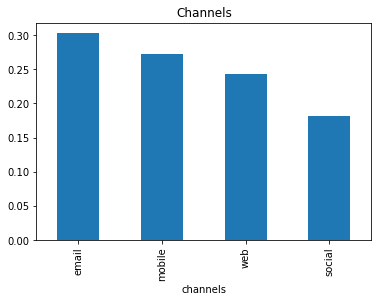

,count
channels,
email,0.303030
mobile,0.272727
web,0.242424
social,0.181818


In [10]:
pos_chan_vals = ['web','email','mobile','social']
f.clean_and_plot(portfolio,'channels',pos_chan_vals,'Channels',True)

* A little more than 30 % of offers are sent over email.
* A liitle more than 27 % of offers are sent over mobile.
* The most preferred channels to send offers are through personal contacts details like email or mobile rather than public channels like web or social.

#### One hot encode the channel column:

In [11]:
def one_hot(portfolio):
    '''
    This function takes the portfoio dataframe and one hot encodes the 
    channels column.
    INPUT:
    portfolio: dataframe - portfolio dataframe with the channels column 
    OUTPUT:
    portfolio: dataframe - one hot encoded portfolio dataframe
    '''
    # loop through the channel column values
    for ch in ['email','mobile','social','web']:
        portfolio[ch] = portfolio['channels'].apply(lambda x: int(ch in x))
    # drop the channels column 
    portfolio.drop('channels',axis=1,inplace=True)
    
    return portfolio

In [12]:
# one hot encode the channel column
portfolio = one_hot(portfolio)
# sort values by offer_type and duration
portfolio.sort_values(by=['offer_type','duration'],inplace=True)
# rename id to port_id
portfolio.rename(columns={'id':'port_id'},inplace=True)
portfolio

,difficulty,duration,port_id,offer_type,reward,email,mobile,social,web
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1


Above table shows our cleaned portfolio dataframe which can be used for futher analysis

## Part 2: Profile

**profile.json** - schema
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**What to expect:**
* a look at the dataset
* missing values in the dataset
* value count of age column and a closer look at age 118
* conversion of became_member_on column to date time format and one hot encoding
* one hot encoding of gender column
* value counts of different columns and their distributions

#### A look at the dataset

In [13]:
print("Profile dataset has {} observations with {} variables each.".format(*profile.shape))
profile.head(10)

Profile dataset has 17000 observations with 5 variables each.


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [14]:
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

#### Missing values in the profile dataset

In [15]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [16]:
profile.isnull().mean()*100

age                  0.000000
became_member_on     0.000000
gender              12.794118
id                   0.000000
income              12.794118
dtype: float64

Profile dataset have close to 13% missing values in gender and income column. We need to have a closer look into these columns before trying to fill/drop these values.

In [17]:
minimum_age = profile.age.min()
maximum_age = profile.age.max()
print(minimum_age,maximum_age)

18 118


In [18]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

####  From above we can be observe that: 
* There are 17000 person in our dataset,
* There are 8484 are Males, 6129 are Females,212 are marked as others and rest 2175 are null values.
* Minimum age is 18 years and maximum is 118 years.

#### Lets take a closer look at age column

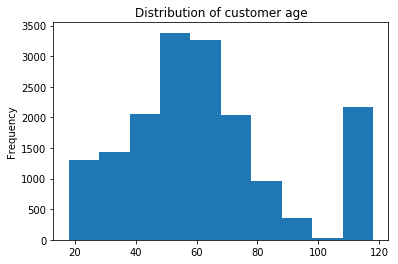

In [19]:
profile.age.plot(kind='hist');
plt.title("Distribution of customer age");

In [20]:
(profile.age.value_counts()/profile.shape[0] * 100).head(10)

118    12.794118
58      2.400000
53      2.188235
51      2.135294
54      2.111765
59      2.111765
57      2.076471
52      2.064706
55      2.058824
56      2.011765
Name: age, dtype: float64

From above it is clear that there are close to 13% people are in the age group 118. This is same as the missing data percentage in other columns.

In [21]:
age118_df = profile[profile.age==118]
len(age118_df)

2175

In [22]:
age_df = profile['age']
min_age = age_df.min()
max_age = age_df.max()
print(min_age,max_age)

18 118


There are 2175 observations with 118 age, hence we cannot consider it as outlier.
Also we can see that there are same number of missing values in the gender and income groups.
There is something different with this age group, maybe people with missing datas are placed in this group and are encoded with age 118 as this has the largest number of observations in any age group which is 2175.
These numbers are close to 13 % of overall data.
Because of all the above reasons we can not drop any of these data right now, we will see how to handle this in modeling section.

#### Convert "became_member_on" column from int  to datetime format

In [23]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format='%Y%m%d')
profile['year'] = profile['became_member_on'].dt.year

In [24]:
profile.head()

,age,became_member_on,gender,id,income,year
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017


In [25]:
profile.groupby('year').min().head(1)

,age,became_member_on,id,income
year,,,,
2013,18,2013-07-29,01b6d7e8f0884deb936a8a7f15dba895,30000.0


In [26]:
profile.groupby('year').max().tail(1)

,age,became_member_on,id,income
year,,,,
2018,118,2018-07-26,fff8957ea8b240a6b5e634b6ee8eafcf,120000.0


As our members joining data is from 1st July 2013 to 31st July 2018, we will create another column member_since by taking 31st July as the date to calculate the days a customer is a member

In [27]:
mem_last_date = pd.to_datetime(20180731,format='%Y%m%d')

profile['member_since'] = (mem_last_date - profile['became_member_on']).dt.days

In [28]:
profile.drop('became_member_on',axis=1,inplace=True)
profile.head()

,age,gender,id,income,year,member_since
0,118,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,534
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,381
2,118,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,19
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,448
4,118,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,361


In [29]:
profile.year.value_counts()

2017    6469
2018    4198
2016    3526
2015    1830
2014     691
2013     286
Name: year, dtype: int64

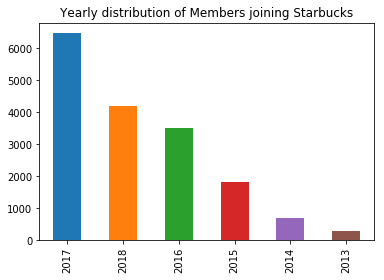

In [30]:
profile.year.value_counts().plot(kind='bar');
plt.title("Yearly distribution of Members joining Starbucks");

We can observe that the popularity of starbucks incrementally went up from 2013 to 2018 and subscriptions to their app saw a phenomenal increase by rising more than 22 times during this period.

#### One hot encode gender column

In [31]:
profile = pd.get_dummies(profile,columns=['gender'])

#### Rename gender columns and change id to person_id

In [32]:
profile = profile.rename(columns={'gender_F':'female','gender_M':'male','gender_O':'other','id':'person_id'})

In [33]:
def add_group(df,col,x,y):
    '''
    This function one hot encodes the given column.
    
    INPUT:
    df: dataframe  - containing the required columns to one hot encode
    col: string - name of the column to be one hot encoded
    x: int - starting age of column range group
    y: int - ending age of column range group
    
    OUTPUT:
    new_col = one hot encoded col for a particular group
    '''
    new_col = df[col].apply(lambda val: 1 if ((val >= x) & (val <= y)) else 0)
    return new_col

In [34]:
# create age range group cols
# start at age 10 to 19 and create groups till 119
for i in range(10,120,10):
    profile['age_{}_{}'.format(i,i+9)] = add_group(profile,'age',i, i+9)

Lets check distribution of income column:

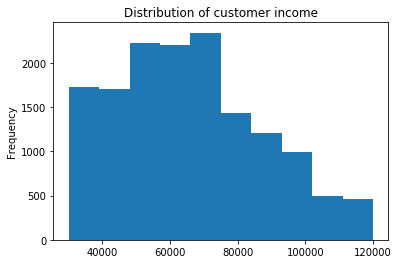

In [35]:
profile.income.plot(kind='hist');
plt.title("Distribution of customer income");

In [36]:
profile.income.min()

30000.0

In [37]:
profile.income.max()

120000.0

In [38]:
# create income range group columns
# start at income of 21000 to 30000 and create groups till 120000
for x,y in zip(range(21000,111001,10000),range(30000,120001,10000)):
    profile['income_{}_{}'.format(x,y)] = add_group(profile,'income',x,y)
    

In [39]:
profile.drop(['age','income'],axis=1,inplace=True)

In [40]:
profile.columns

Index(['person_id', 'year', 'member_since', 'female', 'male', 'other',
       'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59',
       'age_60_69', 'age_70_79', 'age_80_89', 'age_90_99', 'age_100_109',
       'age_110_119', 'income_21000_30000', 'income_31000_40000',
       'income_41000_50000', 'income_51000_60000', 'income_61000_70000',
       'income_71000_80000', 'income_81000_90000', 'income_91000_100000',
       'income_101000_110000', 'income_111000_120000'],
      dtype='object')

**Conclusion:**
    We can say that there are 17000 people in the datatset with 2175 missing information tagged by age 118. This dataset if of customers from July 2013 to July 2018 where customers are continously increasing every year with last year as exception because the data is only till july.

## Part3: Transcript

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**What to expect:**
* a look into the dataset
* missing values in the dataset
* a look into event column, its value counts and unique values
* ohe hot encoding of value columns
* addition of new columns like offer_used, offer_unseen, total_spent, total_reward

#### A look into the dataset

In [41]:
print("Transcript dataset has {} observations with {} variables each.".format(*transcript.shape))
transcript.head(n=10)

Transcript dataset has 306534 observations with 4 variables each.


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [42]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

In [43]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

There are no missing values in this dataset

In [44]:
transcript.shape

(306534, 4)

In [45]:
transcript.person.nunique()

17000

In [46]:
f.unique_vals(transcript,'event')

['offer received', 'offer viewed', 'transaction', 'offer completed']

In [47]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [48]:
def count_transact_vals(transcript,col):
    '''
    This function counts the values in the value column of the transcript dataset
    
    INPUT:
    transcript: dataframe - transcript dataframe with value column
    col: string - name of the value column
    
    OUTPUT:
    off_sum: int - count of offers
    amt_sum: int - count of amounts
    oth_sum: int - count of others
    '''
    off_sum = 0
    amt_sum =0
    oth_sum =0
    for i in transcript[col]:
        if 'offer id' in i.keys() or 'offer_id' in i.keys():
            off_sum += 1
        elif 'amount' in i.keys():
            amt_sum += 1
        else:
            oth_sum += 1
    return off_sum,amt_sum,oth_sum 

In [49]:
offers,amounts,others = count_transact_vals(transcript,'value')
print(offers,amounts)

167581 138953


#### Above tables show that: 
    There are 306K+ events for 17000 people in the dataset with no missing entries.
    There are 4 types of events which are transaction, offer received, offer viewed and offer completed
    There are 3 types of values that can be associated with each event, they are offer_id, offer id and amount
    Also there is a time column which gives the the number of hours since the start of test
    There are 138K+ transactions in the dataset, 76K+ offers were received, 57K+ offers were viewed and 33K+ were completed
    Out of 306K+ there are 167K+ offers and 138K+ amounts

#### Convert time columns from 'int' to days

In [50]:
transcript['time'] = transcript['time'].apply(lambda x: x/24 if x != 0 else x)

#### Check number of offers sent and their frequencies

In [51]:
transcript[transcript['event']=='offer received']['time'].value_counts()

17.0    12778
24.0    12765
14.0    12711
21.0    12704
7.0     12669
0.0     12650
Name: time, dtype: int64

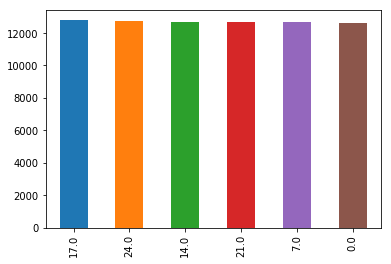

In [52]:
transcript[transcript['event']=='offer received']['time'].value_counts().plot(kind='bar');

Almost more than 12000 offers were sent on 6 occasions in a month

#### What are the days when we see most offer completed

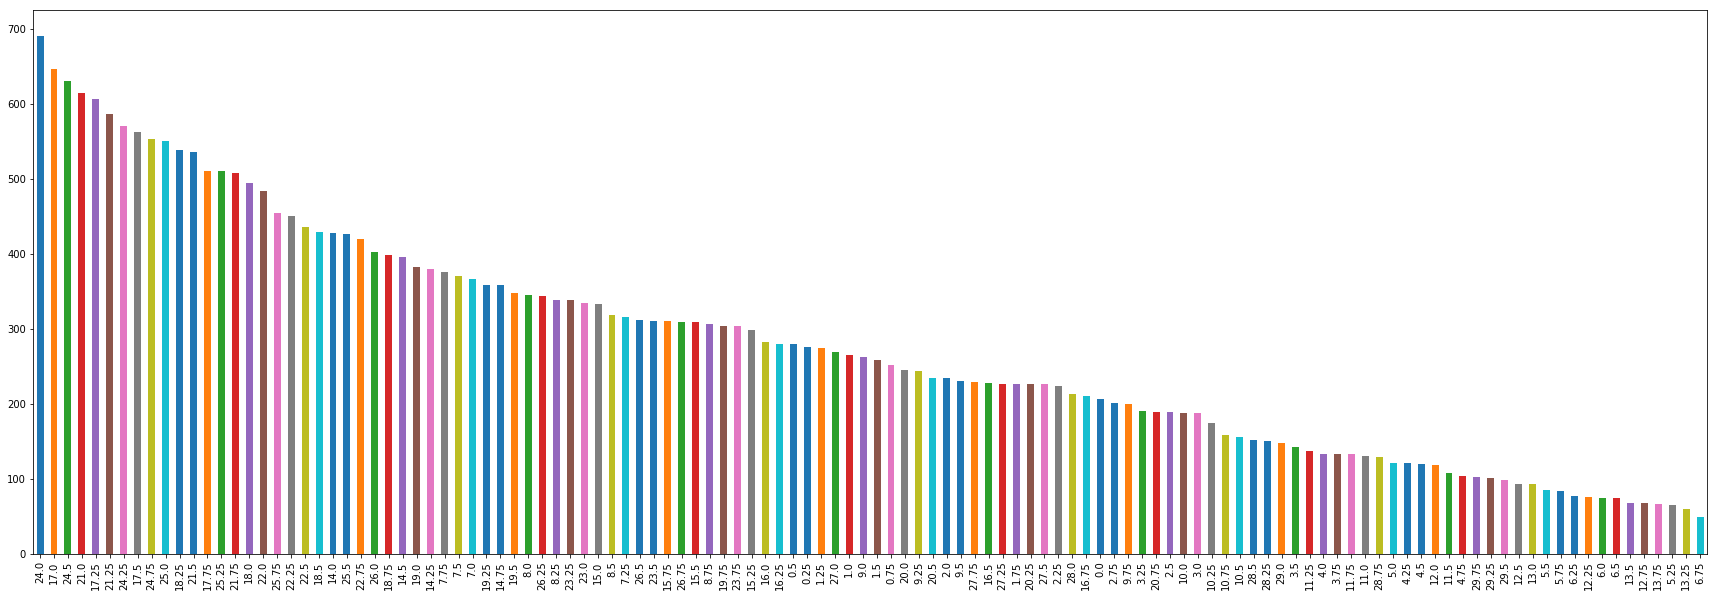

In [53]:
plt.figure(figsize=(30,10))
transcript[transcript['event']=='offer completed']['time'].value_counts().plot(kind='bar');

Maximum used offers are on 24th day followed by 17th day offers

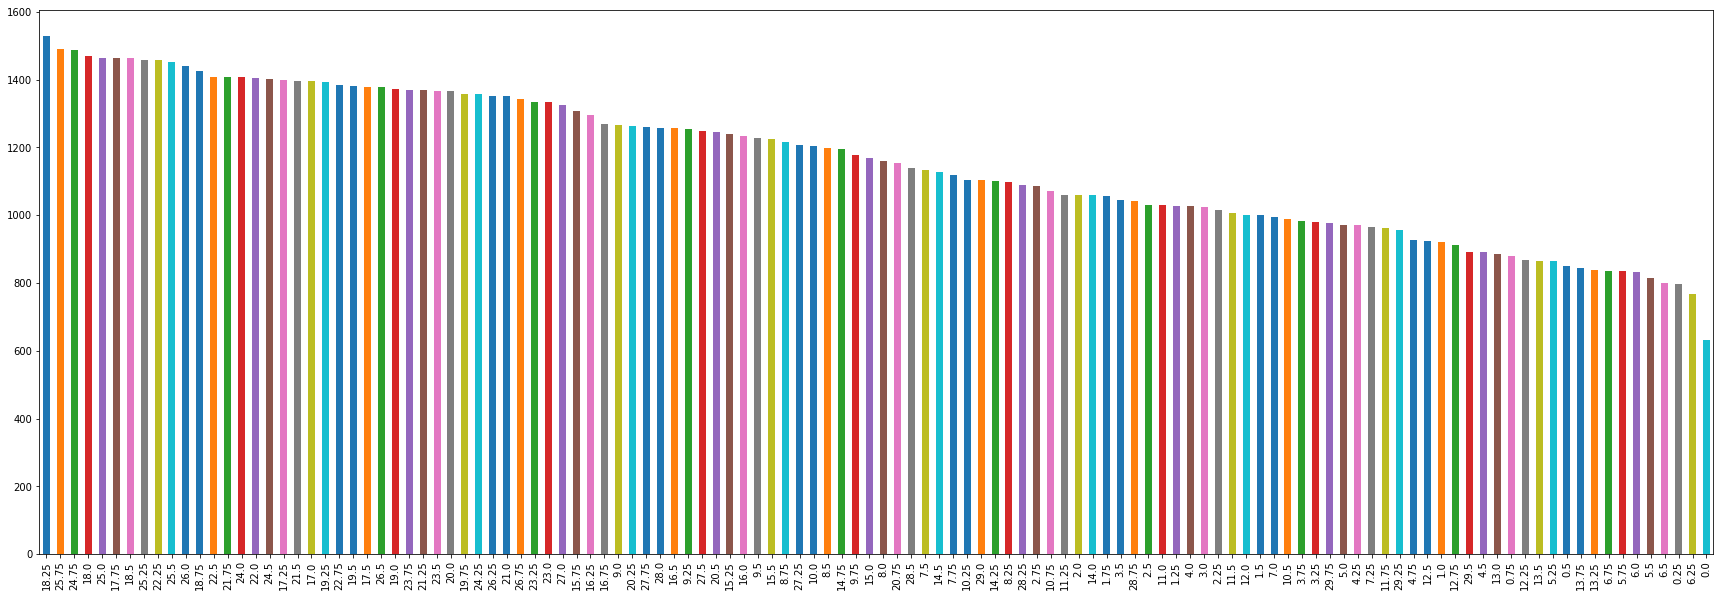

In [54]:
plt.figure(figsize=(30,10))
transcript[transcript['event']=='transaction']['time'].value_counts().plot(kind='bar');

#### One hot encode event and value columns

In [55]:
transcript = pd.get_dummies(transcript,columns=['event'])
transcript = transcript.join(pd.DataFrame(transcript['value'].values.tolist()))

#### Add offer_used column

In [56]:
transcript['offer_used'] = (transcript['event_offer completed']+transcript['reward']).apply(lambda x: 1 if x > 1 else 0)

#### Convert all the offer_types as columns

In [57]:
transcript = transcript.sort_values(by=['person','time'])
transcript.drop('value',axis=1,inplace=True)
transcript = pd.get_dummies(transcript,columns=['offer_id'])

In [58]:
new_col = ['person','offer_rec','offer_view','offer_trans','offer_comp','offer_used','total_spent','total_reward']
all_df = pd.DataFrame(columns=new_col)

In [59]:
def update_all_df(i,j,df,all_df):
    '''
    This functions takes all transaction details of a person and updates their 
    counts in a new dataframe. These details are like how many offers did a person
    received, how many offers did a person view, how many offers did a person used,
    how much (dollars) in total did a person spent, how much (dollars) did a person 
    earn in rewards.
    Finally it updates all the offer types column with the counts for all the offers 
    which a person has used or completed.
    
    INPUT:
    i: int - index value
    j: string - person id
    df: dataframe - all transaction details of a person from transcript dataframe
    new_df: dataframe - dataframe with new columns to update
    offer_map: dictionary - with offer_id as keys and offer names as values
    
    OUTPUT:
    new_df: dataframe - updated dataframe
    '''
    offer_received = np.count_nonzero(df['event_offer received'])
    offer_viewed = np.count_nonzero(df['event_offer viewed'])
    offer_completed = np.count_nonzero(df['event_offer completed'])
    offer_transaction = np.count_nonzero(df['event_transaction'])
    offer_used = np.count_nonzero(df['offer_used'])
    total_spent = np.sum(df['amount'])
    total_reward = np.sum(df['reward'])
    all_df.loc[i,'person'] = j
    all_df.loc[i,['offer_rec','offer_view','offer_trans','offer_comp','offer_used','total_spent','total_reward']] = offer_received,offer_viewed,offer_transaction,offer_completed,offer_used,total_spent,total_reward
    for x in ['0b1e1539f2cc45b7b9fa7c272da2e1d7','2298d6c36e964ae4a3e7e9706d1fb8c2','2906b810c7d4411798c6938adc9daaa5','4d5c57ea9a6940dd891ad53e9dbe8da0','9b98b8c7a33c4b65b9aebfe6a799e6d9','ae264e3637204a6fb9bb56bc8210ddfd','f19421c1d4aa40978ebb69ca19b0e20d','fafdcd668e3743c1bb461111dcafc2a4']:
        z = "offer_id_{}".format(x)
        all_df.loc[i,offer_mapper[x]] = np.sum(df[z])
       
    return all_df

In [60]:
for i in range(len(profile['person_id'])):
    j = profile['person_id'][i]
    temp = transcript[transcript['person']==j]
    all_df = update_all_df(i,j,temp,all_df)

In [61]:
all_df.head()

,person,offer_rec,offer_view,offer_trans,offer_comp,offer_used,total_spent,total_reward,discount_20_10,discount_7_7,discount_10_7,bogo_10_5,bogo_5_7,bogo_10_7,bogo_5_5,discount_10_10
0,68be06ca386d4c31939f3a4f0e3dd783,5.0,5.0,9.0,2.0,2.0,20.4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0610b486422d4921ae7d2bf64640c50b,2.0,0.0,3.0,1.0,1.0,77.01,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,38fe809add3b4fcf9315a9694bb96ff5,2.0,2.0,6.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78afa995795e4d85b5d9ceeca43f5fef,4.0,4.0,7.0,3.0,3.0,159.27,20.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,a03223e636434f42ac4c3df47e8bac43,5.0,3.0,3.0,0.0,0.0,4.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
all_df['offer_unused'] = all_df['offer_rec'] - all_df['offer_used']
all_df['offer_unseen'] = all_df['offer_rec'] - all_df['offer_view']

In [63]:
print(all_df.shape)
all_df.head()

(17000, 18)


,person,offer_rec,offer_view,offer_trans,offer_comp,offer_used,total_spent,total_reward,discount_20_10,discount_7_7,discount_10_7,bogo_10_5,bogo_5_7,bogo_10_7,bogo_5_5,discount_10_10,offer_unused,offer_unseen
0,68be06ca386d4c31939f3a4f0e3dd783,5.0,5.0,9.0,2.0,2.0,20.4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
1,0610b486422d4921ae7d2bf64640c50b,2.0,0.0,3.0,1.0,1.0,77.01,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
2,38fe809add3b4fcf9315a9694bb96ff5,2.0,2.0,6.0,0.0,0.0,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,78afa995795e4d85b5d9ceeca43f5fef,4.0,4.0,7.0,3.0,3.0,159.27,20.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,a03223e636434f42ac4c3df47e8bac43,5.0,3.0,3.0,0.0,0.0,4.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


In [64]:
merged_df = all_df.merge(profile,left_on='person',right_on='person_id',how='left')

In [65]:
print(merged_df.shape)
del merged_df['person_id']
merged_df.head()

(17000, 45)


,person,offer_rec,offer_view,offer_trans,offer_comp,offer_used,total_spent,total_reward,discount_20_10,discount_7_7,...,income_21000_30000,income_31000_40000,income_41000_50000,income_51000_60000,income_61000_70000,income_71000_80000,income_81000_90000,income_91000_100000,income_101000_110000,income_111000_120000
0,68be06ca386d4c31939f3a4f0e3dd783,5.0,5.0,9.0,2.0,2.0,20.4,5.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0610b486422d4921ae7d2bf64640c50b,2.0,0.0,3.0,1.0,1.0,77.01,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,38fe809add3b4fcf9315a9694bb96ff5,2.0,2.0,6.0,0.0,0.0,14.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,4.0,4.0,7.0,3.0,3.0,159.27,20.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,a03223e636434f42ac4c3df47e8bac43,5.0,3.0,3.0,0.0,0.0,4.65,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Section 2: Preprocessing

In this section we will make extract-transform pipeline to preprocess all the datasets

**What to expect:**
* create preprocess_portfolio function for preprocessing of portfolio dataset
* create preprocess_profile function for preprocessing of profile dataset
* create preprocess_transcript function for preprocessing of transcript dataset
* create and update all necessary columns
* make a extract-transform pipeline for running all the above functions

### Create a dictionary with offer_ids as keys and offer_names as values

In [66]:
def map_offers(portfolio):
    """
    This functions maps offer_ids to offer names created by offertype_difficulty_duration
    
    INPUT:
    portfolio - dataframe: portfolio dataframe with columns containing offer_id, offer_type, difficulty and duration
    
    OUPUT:
    offer_mapper - dictionary containing offer_id mapped to offer_names
    """
    # Initialize a dictionary object
    offer_mapper = dict()
    for i in range(portfolio.shape[0]):
        offer_mapper[portfolio.iloc[i]['id']] = portfolio.iloc[i]['offer_type']+'_'+portfolio.iloc[i]['difficulty'].astype(str)+'_'+portfolio.iloc[i]['duration'].astype(str)
    return offer_mapper

### Function to one hot encode portfolio channels column

In [67]:
def one_hot(portfolio):
    '''
    This function takes the portfoio dataframe and one hot encodes the 
    channels column.
    
    INPUT:
    portfolio: dataframe - portfolio dataframe with the channels column 
    
    OUTPUT:
    portfolio: dataframe - one hot encoded portfolio dataframe
    '''
    # loop through the channel column values
    for ch in ['email','mobile','social','web']:
        portfolio[ch] = portfolio['channels'].apply(lambda x: int(ch in x))
    # drop the channels column 
    portfolio.drop('channels',axis=1,inplace=True)
    
    return portfolio

### Function to preprocess portfolio

In [68]:
def preprocess_portfolio(portfolio):
    '''
    This function is a preprocessing pipeline for portfolio dataframe. 
    It first one hot encodes the channel column, then creates a dictionary
    of offer types and their generated names. Finaly renames the id column to port_id.
    
    INPUT:
    portfolio: dataframe - portfolio dataframe that needs to be preprocessed
    
    OUTPUT:
    portfolio: dataframe - processed portfolio dataframe
    offer_mapper: dictionary - containing offer_ids as keys and generated offer_names as values
    '''
    # one hot encode the channels column
    portfolio = one_hot(portfolio)
    # create names for each offer_id as offertype_difficulty_duration
    offer_mapper = map_offers(portfolio)
    # rename id column to port_id
    portfolio.rename(columns={'id':'port_id'},inplace=True)
    return portfolio, offer_mapper

### Function to one hot encode age range columns

In [69]:
def add_age(df,col,x,y):
    '''
    This functions one hot encodes the age column into age range columns
    
    INPUT:
    df: dataframe - the dataframe containing age and age_range columns
    col: string - the age column that needs to be encoded
    x: int - start range of age_range column
    y: int - end range of age_range column
    
    OUTPUT:
    new_col - Series - one hot encoded age_range column
    '''
    new_col = df[col].apply(lambda val: 1 if ((val >= x) & (val <= y)) else 0)
    return new_col

### Function to preprocess profile dataset

In [70]:
def preprocess_profile(profile):
    '''
    This function is a preprocessing pipeline for profile dataframe. It one hot encodes 
    age, income and gender column. It also create year and member_since column.
    
    INPUT:
    profile: dataframe - profile dataframe that needs to be preprocessed
    
    OUTPUT:
    profile: dataframe - processed profile dataframe
    '''
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format='%Y%m%d')
    profile['year'] = profile['became_member_on'].dt.year
    mem_last_date = pd.to_datetime(20180731,format='%Y%m%d')
    profile['member_since'] = (mem_last_date - profile['became_member_on']).dt.days
    profile.drop('became_member_on',axis=1,inplace=True)
    profile = pd.get_dummies(profile,columns=['gender'])
    profile = profile.rename(columns={'gender_F':'female','gender_M':'male','gender_O':'other','id':'person_id'})
    for i in range(10,120,10):
        profile['age_{}_{}'.format(i,i+9)] = add_age(profile,'age',i, i+9)
    for x,y in zip(range(21000,111001,10000),range(30000,120001,10000)):
        profile['income_{}_{}'.format(x,y)] = add_age(profile,'income',x,y)
    profile.drop(['age','income'],axis=1,inplace=True)
    return profile

### Function to preprocess transcript dataset

In [71]:
def preprocess_transcript(transcript):
    '''
    This function is a preprocessing pipeline for transcript dataframe. It one hot encodes 
    event, value and offer_id column. It converts time column from hours to days and creates
    offer_used column.
    
    INPUT:
    transcript: dataframe - transcript dataframe that needs to be preprocessed
    
    OUTPUT:
    transcript: dataframe - final processed transcript dataframe
    '''
    transcript['time'] = transcript['time'].apply(lambda x: x/24 if x != 0 else x)
    transcript = pd.get_dummies(transcript,columns=['event'])
    transcript = transcript.join(pd.DataFrame(transcript['value'].values.tolist()))
    transcript['offer_used'] = (transcript['event_offer completed']+transcript['reward']).apply(
                                lambda x: 1 if x > 1 else 0)
    transcript = transcript.sort_values(by=['person','time'])
    transcript.drop('value',axis=1,inplace=True)
    transcript = pd.get_dummies(transcript,columns=['offer_id'])
    return transcript

### Function to update transaction details person wise

In [72]:
def update_df(i,j,df,new_df,offer_map):
    '''
    This functions takes all transaction details of a person and updates their 
    counts in a new dataframe. These details are like how many offers did a person
    received, how many offers did a person view, how many offers did a person used,
    how much (dollars) in total did a person spent, how much (dollars) did a person 
    earn in rewards.
    Finally it updates all the offer types column with the counts for all the offers 
    which a person has used or completed.
    
    INPUT:
    i: int - index value
    j: string - person id
    df: dataframe - all transaction details of a person from transcript dataframe
    new_df: dataframe - dataframe with new columns to update
    offer_map: dictionary - with offer_id as keys and offer names as values
    
    OUTPUT:
    new_df: dataframe - updated dataframe
    '''
    offer_received = np.count_nonzero(df['event_offer received'])
    offer_viewed = np.count_nonzero(df['event_offer viewed'])
    offer_completed = np.count_nonzero(df['event_offer completed'])
    offer_transaction = np.count_nonzero(df['event_transaction'])
    offer_used = np.count_nonzero(df['offer_used'])
    total_spent = np.sum(df['amount'])
    total_reward = np.sum(df['reward'])
    new_df.loc[i,'person'] = j
    new_df.loc[i,['offer_rec','offer_view','transact','offer_comp','offer_used','total_spent','total_reward']] = offer_received,offer_viewed,offer_transaction,offer_completed,offer_used,total_spent,total_reward
    for x in ['0b1e1539f2cc45b7b9fa7c272da2e1d7','2298d6c36e964ae4a3e7e9706d1fb8c2','2906b810c7d4411798c6938adc9daaa5','4d5c57ea9a6940dd891ad53e9dbe8da0','9b98b8c7a33c4b65b9aebfe6a799e6d9','ae264e3637204a6fb9bb56bc8210ddfd','f19421c1d4aa40978ebb69ca19b0e20d','fafdcd668e3743c1bb461111dcafc2a4']:
        z = "offer_id_{}".format(x)
        new_df.loc[i,offer_map[x]] = np.sum(df[z])
       
    return new_df

### Extract transform pipeline that reads in all the 3 datasets, preprocess it and finally merges it

In [73]:
def et_pipeline(portfolio,profile,transcript):
    '''
    This functions create a extract-transform pipeline for preprocessing. 
    First it preprocess all the three dataframe (portfolio,profile and transcript),
    creates a new dataframe with generated columns, updates their values 
    and add 2 new columns.
    Finally it merges new dataframe with profile dataframe.
    
    INPUT:
    portfolio: dataframe - portfolio dataframe for processing
    profile: dataframe- profile dataframe for processing
    transcript: dataframe - transcript dataframe for processing
    
    OUTPUT:
    merged_df: dataframe - final merged dataframe that can be used for analysis
    '''
    # read in the json files
    portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
    profile = pd.read_json('data/profile.json', orient='records', lines=True)
    transcript = pd.read_json('data/transcript.json', orient='records', lines=True)
    portfolio, offer_map = preprocess_portfolio(portfolio)
    profile = preprocess_profile(profile)
    transcript = preprocess_transcript(transcript)
    cols = ['person','offer_rec','offer_view','transact','offer_comp','offer_used','total_spent','total_reward']
    new_df = pd.DataFrame(columns=cols)
    n_users = len(profile['person_id'])
    cnter = 0
    bar = progressbar.ProgressBar(maxval=n_users+1, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for i in range(n_users):
        cnter+=1 
        bar.update(cnter)
        j = profile['person_id'][i]
        temp = transcript[transcript['person']==j]
        new_df = update_df(i,j,temp,new_df,offer_map)
    bar.finish()
    new_df['offer_unused'] = new_df['offer_rec'] - new_df['offer_used']
    new_df['offer_unseen'] = new_df['offer_rec'] - new_df['offer_view']
    merged_df = new_df.merge(profile,left_on='person',right_on='person_id',how='left')
    del merged_df['person_id']
    return merged_df

In [74]:
merged_df = et_pipeline(portfolio,profile,transcript)

[========================================================================] 100%


Above is our cleaned and merged dataframe that can used for analysis

# Section 3: Analysis

**Business Questions:**
*    Which groups of people are most responsive to each type of offer

For this task we will create a function that groups our merged dataset by offer types and then finds the top most used offer type based on the number of users by different feature group

In [75]:
# List of column names
dis_cols = ['discount_20_10', 'discount_7_7', 'discount_10_7', 'discount_10_10']
bogo_cols = ['bogo_10_5', 'bogo_5_7', 'bogo_10_7','bogo_5_5']
offer_cols = ['discount_20_10', 'discount_7_7', 'discount_10_7', 'discount_10_10','bogo_10_5', 'bogo_5_7', 'bogo_10_7','bogo_5_5']
inc_cols = ['income_21000_30000','income_31000_40000','income_41000_50000','income_51000_60000','income_61000_70000','income_71000_80000','income_81000_90000','income_91000_100000','income_101000_110000','income_111000_120000']
year_cols = ['2018','2017','2016','2015','2014','2013']
age_cols = ['age_10_19', 'age_20_29','age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79','age_80_89', 'age_90_99', 'age_100_109', 'age_110_119']

In [76]:
clean_df = merged_df.copy()

### Function to find group of people most response to each type of offer

In [77]:
def groupby_offer(offer,df=clean_df):
    '''
    This function given an offer type returns the most used/completed based on number
    of users by age_group, by income_group, by gender and by year
    
    INPUT:
    offer: string - the name of offer type 
    df: dataframe - the dataframe containing offer column to look up for top used offer
    
    OUTPUT:
    age_group: string - the age_group which is the topmost user of the offer
    age_max: int - the number of users in the age_group
    income_group: string - the income_group which is the topmost user of the offer
    income_max: int - the number of users in the income_group
    gender_group: string - the gender_group which is the topmost user of the offer
    gender_max: int - the number of users in the gender_group
    year_group: string - the year_group which is the topmost user of the offer
    year_max: int - the number of users in the year_group
    '''
    df = df[df[offer]==1]
    age= df.filter(like='age').sum()
    income = df.filter(like='income').sum()
    age_group = np.argmax(age)
    age_max = np.max(age)
    income_group = np.argmax(income)
    income_max = np.max(income)
    gen = df[['male','female']].sum()
    gender_group = np.argmax(gen)
    gender_max = np.max(gen)
    year_group = df.year.value_counts().keys()[0]
    year_max = df.year.value_counts().values[0]
    #return age_group,age_max,income_group,income_max,gender_group,gender_max,year_group,year_max
    return age_group, income_group, gender_group

In [78]:
top_cust = {}
# iterate over different discount offer types
for col in dis_cols:
    print(col    ,groupby_offer(col))
    top_cust[col] = groupby_offer(col) 
# iterate over different bogo offer types
for col in bogo_cols:
    print(col    ,groupby_offer(col))
    top_cust[col] = groupby_offer(col)

discount_20_10 ('age_50_59', 'income_71000_80000', 'female')
discount_7_7 ('age_50_59', 'income_51000_60000', 'male')
discount_10_7 ('age_50_59', 'income_51000_60000', 'male')
discount_10_10 ('age_50_59', 'income_51000_60000', 'male')
bogo_10_5 ('age_50_59', 'income_71000_80000', 'female')
bogo_5_7 ('age_50_59', 'income_51000_60000', 'male')
bogo_10_7 ('age_50_59', 'income_71000_80000', 'female')
bogo_5_5 ('age_50_59', 'income_51000_60000', 'male')


In [79]:
pd.DataFrame(top_cust)

,discount_20_10,discount_7_7,discount_10_7,discount_10_10,bogo_10_5,bogo_5_7,bogo_10_7,bogo_5_5
0,age_50_59,age_50_59,age_50_59,age_50_59,age_50_59,age_50_59,age_50_59,age_50_59
1,income_71000_80000,income_51000_60000,income_51000_60000,income_51000_60000,income_71000_80000,income_51000_60000,income_71000_80000,income_51000_60000
2,female,male,male,male,female,male,female,male


### Lets analyze which age group is responsive to each offer type ignoring other features

In [80]:
def groupby_age(ag=None,age_cols=age_cols,df=clean_df,offer=offer_cols):
    if ag is None:
        age_group = age_cols
    else:
        for ag_grp in age_cols:
            ag_range = range(int(ag_grp.split('_')[1]),int(ag_grp.split('_')[2])+1)
            if ag in ag_range:
                age_group = ag_grp
    df = df[df[age_group]==1]
    ofr= df[offer].sum()
    offer_group = np.argmax(ofr)
    offer_max = np.max(ofr)
    return offer_group

In [81]:
# iterate over different age range columns
for ag in age_cols:
    print("{}:    ".format(ag),groupby_age(age_cols=ag))

age_10_19:     discount_7_7
age_20_29:     discount_7_7
age_30_39:     discount_10_10
age_40_49:     discount_7_7
age_50_59:     discount_10_10
age_60_69:     discount_10_10
age_70_79:     discount_7_7
age_80_89:     discount_7_7
age_90_99:     discount_10_10
age_100_109:     discount_10_10
age_110_119:     discount_10_10


For example lets check for age 53 which is the most used offer

In [82]:
groupby_age(53)

'discount_10_10'

### Lets analyze which gender is most responsive to which offer type irrespective of other features

In [83]:
def groupby_gender(gen,df=clean_df,offer=offer_cols):
    if gen=='M' or gen=='Male' or gen=='male':
        gen = 'male'
    elif gen == 'F' or gen == 'Female' or gen=='female':
        gen = 'female'
    elif gen == 'O' or gen == 'Other' or gen == 'other':
        gen = 'other'
    df = df[df[gen]==1]
    ofr= df[offer].sum()
    offer_group = np.argmax(ofr)
    offer_max = np.max(ofr)
    return offer_group

In [84]:
# iterate over different gender values
for gen in ['male','female','other']:
    print("{}:    ".format(gen),groupby_gender(gen))

male:     discount_10_10
female:     discount_10_10
other:     bogo_5_7


### Lets analyze which income group is most responsive to each offer type keeping all other features constant

In [85]:
def groupby_income(inc=None,inc_cols=inc_cols,df=clean_df,offer=offer_cols):
    if inc is None:
        inc_group = inc_cols
    else:
        for in_grp in inc_cols:
            inc_range = range(int(in_grp.split('_')[1]),int(in_grp.split('_')[2])+1)
            if inc in inc_range:
                inc_group = in_grp
    df = df[df[inc_group]==1]
    ofr= df[offer].sum()
    offer_group = np.argmax(ofr)
    offer_max = np.max(ofr)
    return offer_group

In [86]:
# iterate over income group columns
for income in inc_cols:
    print("{}:    ".format(income),groupby_income(inc_cols=income))

income_21000_30000:     discount_10_10
income_31000_40000:     discount_7_7
income_41000_50000:     discount_10_10
income_51000_60000:     discount_7_7
income_61000_70000:     discount_10_10
income_71000_80000:     discount_10_10
income_81000_90000:     discount_10_10
income_91000_100000:     bogo_10_7
income_101000_110000:     discount_10_10
income_111000_120000:     discount_10_10


In [87]:
groupby_income(40000)

'discount_7_7'

### For each gender type and for each offer which income group and age group to send offer

In [88]:
def groupby_gender_offer_stats(df,gender,offer):
    '''
    This functions given a gender and offer type return the age group and income group 
    that most used the offer.
    
    INPUT:
    df: dataframe - the dataframe with the offer column
    gender: string - the gender for which stats are required
    offer: string - offer type name for which stats are required
    
    OUPUT:
    inc_group: string - the name of income group which most used the given offer
    inc_max: int - the max number of users in the income group
    age_group: string - the name of age group which most used the fiven offer
    age_max : int - the max number of users in the age group
    '''
    gen_df = df[df[gender]==1]
    gen_df = gen_df.groupby(offer).sum()
    gen_df = gen_df.loc[1.0:,:].sum()
    inc = gen_df[inc_cols]
    age = gen_df[['age_10_19', 'age_20_29','age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79','age_80_89', 'age_90_99', 'age_100_109', 'age_110_119']]
    inc_group = np.argmax(inc)
    inc_max = np.max(inc)
    age_group = np.argmax(age)
    age_max = np.max(age)
    #return inc_group, inc_max,age_group,age_max
    return inc_group, age_group

In [89]:
# iterate over different discount offer types for males
for col in dis_cols:
    print("Male_{}:    ".format(col),groupby_gender_offer_stats(clean_df,'male',col))
    
# iterate over different bogo offer types for males
for col in bogo_cols:
    print("Male_{}:    ".format(col),groupby_gender_offer_stats(clean_df,'male',col))    

# iterate over different discount offer types for female     
for col in dis_cols:
    print("Female_{}:    ".format(col),groupby_gender_offer_stats(clean_df,'female',col))
    
# iterate over different bogo offer types for female
for col in bogo_cols:
    print("Female_{}:    ".format(col),groupby_gender_offer_stats(clean_df,'female',col))
    
# iterate over different discount offer types for other gender type
for col in dis_cols:
    print("Other_{}:    ".format(col),groupby_gender_offer_stats(clean_df,'other',col))
    
# iterate over different bogo offer types for other gender type
for col in bogo_cols:
    print("Other_{}:    ".format(col),groupby_gender_offer_stats(clean_df,'other',col))


Male_discount_20_10:     ('income_61000_70000', 'age_50_59')
Male_discount_7_7:     ('income_51000_60000', 'age_50_59')
Male_discount_10_7:     ('income_61000_70000', 'age_50_59')
Male_discount_10_10:     ('income_51000_60000', 'age_50_59')
Male_bogo_10_5:     ('income_51000_60000', 'age_50_59')
Male_bogo_5_7:     ('income_51000_60000', 'age_50_59')
Male_bogo_10_7:     ('income_51000_60000', 'age_50_59')
Male_bogo_5_5:     ('income_61000_70000', 'age_50_59')
Female_discount_20_10:     ('income_71000_80000', 'age_50_59')
Female_discount_7_7:     ('income_71000_80000', 'age_50_59')
Female_discount_10_7:     ('income_71000_80000', 'age_50_59')
Female_discount_10_10:     ('income_71000_80000', 'age_50_59')
Female_bogo_10_5:     ('income_71000_80000', 'age_50_59')
Female_bogo_5_7:     ('income_71000_80000', 'age_50_59')
Female_bogo_10_7:     ('income_71000_80000', 'age_50_59')
Female_bogo_5_5:     ('income_51000_60000', 'age_50_59')
Other_discount_20_10:     ('income_51000_60000', 'age_50_5

### For each age group and each offer which gender and income group to send offer

In [90]:
def groupby_age_offer_stats(df,ag,offer):
    age_df = df[df[ag]==1]
    age_df = age_df.groupby(offer).sum()
    age_df = age_df.loc[1.0:,:].sum()
    gen = df[['male','female']].sum()
    gender_group = np.argmax(gen)
    gender_max = np.max(gen)
    inc = age_df[inc_cols]
    inc_group = np.argmax(inc)
    inc_max = np.max(inc)
    year_group = df[df[ag]==1].year.value_counts().keys()[0]
    year_max = df[df[ag]==1].year.value_counts().values[0]
    #return gender_group,gender_max,inc_group, inc_max,year_group,year_max
    return gender_group,inc_group

In [91]:
# iterate over differnt discount columns
for col in dis_cols:
    # iterate over different age group columns
    for ag in age_cols:
        print("{}_{}:   ".format(col,ag),groupby_age_offer_stats(clean_df,ag,col))
        
# iterate over different bogo columns
for col in bogo_cols:
    # iterate over different age group columns
    for ag in age_cols:
        print("{}_{}:   ".format(col,ag),groupby_age_offer_stats(clean_df,ag,col))

discount_20_10_age_10_19:    ('male', 'income_41000_50000')
discount_20_10_age_20_29:    ('male', 'income_51000_60000')
discount_20_10_age_30_39:    ('male', 'income_51000_60000')
discount_20_10_age_40_49:    ('male', 'income_51000_60000')
discount_20_10_age_50_59:    ('male', 'income_71000_80000')
discount_20_10_age_60_69:    ('male', 'income_71000_80000')
discount_20_10_age_70_79:    ('male', 'income_81000_90000')
discount_20_10_age_80_89:    ('male', 'income_71000_80000')
discount_20_10_age_90_99:    ('male', 'income_71000_80000')
discount_20_10_age_100_109:    ('male', 'income_41000_50000')
discount_20_10_age_110_119:    ('male', 'income_21000_30000')
discount_7_7_age_10_19:    ('male', 'income_31000_40000')
discount_7_7_age_20_29:    ('male', 'income_31000_40000')
discount_7_7_age_30_39:    ('male', 'income_61000_70000')
discount_7_7_age_40_49:    ('male', 'income_51000_60000')
discount_7_7_age_50_59:    ('male', 'income_71000_80000')
discount_7_7_age_60_69:    ('male', 'income_71

### For each income group and each offer which gender and age group to send offer

In [92]:
def groupby_income_offer_stats(df,inc,offer):
    inc_df = df[df[inc]==1]
    inc_df = inc_df.groupby(offer).sum()
    inc_df = inc_df.loc[1.0:,:].sum()
    age = inc_df[['age_10_19', 'age_20_29','age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79','age_80_89', 'age_90_99', 'age_100_109', 'age_110_119']]
    age_group = np.argmax(age)
    age_max = np.max(age)
    gen = inc_df[['male','female']].sum()
    gender_group = np.argmax(gen)
    gender_max = np.max(gen)
    year_group = df[df[inc]==1].year.value_counts().keys()[0]
    year_max = df[df[inc]==1].year.value_counts().values[0]
    #return age_group,age_max,gender_group,gender_max,year_group,year_max
    return age_group, gender_group

In [93]:
# iterate over differnt discount columns
for col in dis_cols:
    # iterate over different income group columns
    for inc in inc_cols:
        print("{}_{}:   ".format(col,inc),groupby_income_offer_stats(clean_df,inc,col))
        
## iterate over different bogo columns        
for col in bogo_cols:
    # iterate over different income group columns
    for inc in inc_cols:
        print("{}_{}:   ".format(col,inc),groupby_income_offer_stats(clean_df,inc,col))

discount_20_10_income_21000_30000:    ('age_40_49', 0)
discount_20_10_income_31000_40000:    ('age_50_59', 0)
discount_20_10_income_41000_50000:    ('age_30_39', 0)
discount_20_10_income_51000_60000:    ('age_50_59', 0)
discount_20_10_income_61000_70000:    ('age_50_59', 0)
discount_20_10_income_71000_80000:    ('age_50_59', 0)
discount_20_10_income_81000_90000:    ('age_50_59', 0)
discount_20_10_income_91000_100000:    ('age_50_59', 0)
discount_20_10_income_101000_110000:    ('age_50_59', 0)
discount_20_10_income_111000_120000:    ('age_50_59', 0)
discount_7_7_income_21000_30000:    ('age_50_59', 0)
discount_7_7_income_31000_40000:    ('age_20_29', 0)
discount_7_7_income_41000_50000:    ('age_20_29', 0)
discount_7_7_income_51000_60000:    ('age_50_59', 0)
discount_7_7_income_61000_70000:    ('age_50_59', 0)
discount_7_7_income_71000_80000:    ('age_50_59', 0)
discount_7_7_income_81000_90000:    ('age_50_59', 0)
discount_7_7_income_91000_100000:    ('age_50_59', 0)
discount_7_7_income_

In [94]:
def groupby_year_offer_stats(df,yr,offer):
    year_df = df[df['year']==int(yr)]
    year_df = year_df.groupby(offer).sum()
    year_df = year_df.loc[1.0:,:].sum()
    inc = year_df[inc_cols]
    age = year_df[['age_10_19', 'age_20_29','age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79','age_80_89', 'age_90_99', 'age_100_109', 'age_110_119']]
    inc_group = np.argmax(inc)
    inc_max = np.max(inc)
    age_group = np.argmax(age)
    age_max = np.max(age)
    gen = df[['male','female']].sum()
    gender_group = np.argmax(gen)
    gender_max = np.max(gen)
    #return inc_group, inc_max,age_group,age_max,gender_group,gender_max
    return inc_group, age_group, gender_group

In [95]:
for col in dis_cols:
    for yr in year_cols:
        print("{}_{}:   ".format(yr,col),groupby_year_offer_stats(clean_df,yr,col))
for col in bogo_cols:
    for yr in year_cols:
        print("{}_{}:   ".format(yr,col),groupby_year_offer_stats(clean_df,yr,col))

2018_discount_20_10:    ('income_51000_60000', 'age_50_59', 'male')
2017_discount_20_10:    ('income_71000_80000', 'age_50_59', 'male')
2016_discount_20_10:    ('income_51000_60000', 'age_50_59', 'male')
2015_discount_20_10:    ('income_71000_80000', 'age_50_59', 'male')
2014_discount_20_10:    ('income_61000_70000', 'age_50_59', 'male')
2013_discount_20_10:    ('income_61000_70000', 'age_40_49', 'male')
2018_discount_7_7:    ('income_51000_60000', 'age_50_59', 'male')
2017_discount_7_7:    ('income_51000_60000', 'age_50_59', 'male')
2016_discount_7_7:    ('income_71000_80000', 'age_50_59', 'male')
2015_discount_7_7:    ('income_51000_60000', 'age_50_59', 'male')
2014_discount_7_7:    ('income_61000_70000', 'age_50_59', 'male')
2013_discount_7_7:    ('income_51000_60000', 'age_40_49', 'male')
2018_discount_10_7:    ('income_51000_60000', 'age_50_59', 'male')
2017_discount_10_7:    ('income_71000_80000', 'age_50_59', 'male')
2016_discount_10_7:    ('income_71000_80000', 'age_50_59', 'ma

# Section 4: Modeling

## Part 1: Statistical Model

#### Utility Functions for getting age group and income group

In [96]:
def get_age_group(ag,cols=age_cols):
    '''
    This function returns the age_group given the age.
    
    INPUT:
    ag: string/int - age of the person
    cols: list(string) - list of age_group cols to look through
    
    OUTPUT:
    ag_grp: string - the age_group name if age is there in the groups
    None: if age not in age_groups
    '''
    for ag_grp in cols:
        ag_range = range(int(ag_grp.split('_')[1]),int(ag_grp.split('_')[2]))
        if int(ag) in ag_range:
            return ag_grp
    return None

In [97]:
def get_inc_group(inc,cols=inc_cols):
    '''
    This function returns the income_group given a income.
    
    INPUT:
    ag: string/int - income of the person
    cols: list(string) - list of income_group cols to look through
    
    OUTPUT:
    in_grp: string - the income_group name if income is there in the groups
    None: if income not in income_groups
    '''
    for in_grp in cols:
        inc_range = range(int(in_grp.split('_')[1]),int(in_grp.split('_')[2])+1)
        if int(inc) in inc_range:
            return in_grp
    else:
        return None 

### 1 Dimension Modeling

Create a model which takes any one feature and suggests the best offer to send to the customer. This suggestion is based on the top most used offer in that particular feature group based on number of users who used/completed the offer

In [98]:
def groupby_1d(dim1,df=clean_df,offer=offer_cols):
    '''
    This functions finds the topmost used offer to be suggested based on 
    the number of users given a feature from any of the three features
    (age, income, gender).
    
    INPUT:
    dim1: string/int - the feature for which the most used offer is desired
    df: dataframe - the dataframe to look through for topused offer
    offer: list(string) - the list of offer types to search from
    
    OUTPUT:
    offer_group: string - name of offer type that is suggested for the given feature
    
    '''
    if (str(dim1).isdigit()) and (len(str(dim1)) <=3):
        dim1 = get_age_group(dim1)
    elif str(dim1).isdigit():
        dim1 = get_inc_group(dim1)
    elif str(dim1).isdigit==False:
        dim1 = dim1
       
    df1 = df[df[dim1]==1]
    ofr= df1[offer].sum()
    offer_group = np.argmax(ofr)
    offer_max = np.max(ofr)
    return offer_group

In [99]:
groupby_1d(50)

'discount_10_10'

In [100]:
groupby_1d(20)

'discount_7_7'

In [101]:
groupby_1d('other')

'bogo_5_7'

In [102]:
groupby_1d('female')

'discount_10_10'

In [103]:
groupby_1d(55000)

'discount_7_7'

In [104]:
groupby_1d(75000)

'discount_10_10'

In [105]:
groupby_1d(95000)

'bogo_10_7'

### 2 Dimension Modeling

Create a model which takes any 2 feature and suggests the best offer to send to the customer. This suggestion is based on the top most used offer in that particular feature group based on number of users who used/completed the offer

In [106]:
def groupby_2d(dim1,dim2,df=clean_df,offer=offer_cols):
    '''
    This functions finds the topmost used offer to be suggested based on 
    the number of users given 2 feature from any of the three features
    (age, income, gender).
    
    INPUT:
    dim1: string/int - first feature out of 2 for which the most used offer is desired
    dim2: string/int - second feature out of 2 for which the most used offer is desired
    df: dataframe - the dataframe to look through for topused offer
    offer: list(string) - the list of offer types to search from
    
    OUTPUT:
    offer_group: string - name of offer type that is suggested for the given feature
    
    '''
    if (str(dim1).isdigit()) and (len(str(dim1)) <=3):
        dim1 = get_age_group(dim1)
    elif str(dim1).isdigit():
        dim1 = get_inc_group(dim1)
    elif str(dim1).isdigit==False:
        dim1 = dim1
       
    if str(dim2).isdigit() and len(str(dim2)) <=3:
        dim2 = get_age_group(dim2)
    elif str(dim2).isdigit():
        dim2 = get_inc_group(dim2)
    elif str(dim2).isdigit==False:
        dim2 = dim2 
    df1 = df[df[dim1]==1]
    df2 = df1[df[dim2]==1]
    ofr= df2[offer].sum()
    offer_group = np.argmax(ofr)
    offer_max = np.max(ofr)
    return offer_group   

In [107]:
groupby_2d('male', '50')

'discount_10_10'

In [108]:
groupby_2d('male',72000)

'discount_7_7'

In [109]:
groupby_2d('35000','male')

'discount_7_7'

In [110]:
groupby_2d('40000','female')

'discount_7_7'

In [111]:
groupby_2d('60000','other')

'bogo_5_5'

In [112]:
groupby_2d('100','male')

'discount_10_10'

In [113]:
groupby_2d('100','female')

'discount_10_7'

In [114]:
groupby_2d('100','70000')

'discount_10_10'

### 3 Dimensions Analysis

Create a model which takes all the 3 feature and suggests the best offer to send to the customer. This suggestion is based on the top most used offer in that particular feature group based on number of users who used/completed the offer

In [115]:
def groupby_3d(dim1,dim2,dim3,df=clean_df,offer=offer_cols):
    '''
    This functions finds the topmost used offer to be suggested based on 
    the number of users given any 3 feature (age, income, gender).
    
    INPUT:
    dim1: string/int - first feature out of 3 for which the most used offer is desired
    dim2: string/int - second feature out of 3 for which the most used offer is desired
    dim3: string/int - third feature out of 3 for which the most used offer is desired
    df: dataframe - the dataframe to look through for topused offer
    offer: list(string) - the list of offer types to search from
    
    OUTPUT:
    offer_group: string - name of offer type that is suggested for the given feature
    
    '''
    if (str(dim1).isdigit()) and (len(str(dim1)) <=3):
        dim1 = get_age_group(dim1)
    elif str(dim1).isdigit():
        dim1 = get_inc_group(dim1)
    elif str(dim1).isdigit==False:
        dim1 = dim1
       
    if str(dim2).isdigit() and len(str(dim2)) <=3:
        dim2 = get_age_group(dim2)
    elif str(dim2).isdigit():
        dim2 = get_inc_group(dim2)
    elif str(dim2).isdigit==False:
        dim2 = dim2 
        
    if str(dim3).isdigit() and len(str(dim3)) <=3:
        dim3 = get_age_group(dim3)
    elif str(dim3).isdigit():
        dim3 = get_inc_group(dim3)
    elif str(dim3).isdigit==False:
        dim3 = dim3
        
    df1 = df[df[dim1]==1]
    df2 = df1[df[dim2]==1]
    df3 = df2[df[dim3]==1]
    ofr= df3[offer].sum()
    offer_group = np.argmax(ofr)
    offer_max = np.max(ofr)
    return offer_group 

In [116]:
groupby_3d(20,50000,'male')

'discount_10_10'

In [117]:
groupby_3d(20,50000,'female')

'discount_7_7'

In [118]:
groupby_3d(20,50000,'other')

'discount_7_7'

In [119]:
groupby_3d(80000,50,'male')

'bogo_5_5'

In [120]:
groupby_3d('female',110,'115000')

'discount_20_10'

## Final Model

Create a function that takes any number of features from 1 to 3. Appropriately routes the arguments to the 1d, 2d, or 3d functions and returns the suggested offer to send.

In [121]:
def find_best_offer(*arg):
    '''
    This functions finds the topmost used offer to be suggested based on 
    the number of users given any number of features from (age, income, gender).
    
    INPUT:
    *arg: string/int - any number of feature out of 3 for which the most used offer is desired
    
    
    OUTPUT:
    prints offer_group: string - name of offer type that is suggested for the given feature
    
    '''
    
    if len(arg)==1:
        dim1 = arg[0]
        print(groupby_1d(dim1))
    elif len(arg)==2:
        dim1,dim2=arg
        print(groupby_2d(dim1,dim2))
    elif len(arg)==3:
        dim1,dim2,dim3=arg
        print(groupby_3d(dim1,dim2,dim3))
    else:
        print("please input a valid arg")

For example lets find the best offer to send to a person with age 70 keeping other features unchanged

In [122]:
find_best_offer(70)

discount_7_7


Now lets say the person with age 70 is a male

In [123]:
find_best_offer(70,'male')

discount_10_10


Now lets say the person with age 70 is a male and his income is  85000

In [124]:
find_best_offer(70,'male',85000)

bogo_10_7


#### Model Evaluation

For determining the effectiveness of our model we have to conduct an experiment. In this experiment, we will divide our customers into 2 groups, one promotional group to whom we will send offers and second will be the non promotional group to whom we will not send offers. We will use a null hypothesis that there in no difference in the response rate between the two groups.

One most important part will be the sampling of customers to send offers. For sampling we will consider age_groups from our dataset and take samples from each age_group range so that our sample represents the whole customer set and there is no risk of underrepresentation or bias. We will send offers to these customers and observe their response rate of both the groups.

**For evaluation metric, we will use Incremental response rate which are defined as follows:**

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


This will help us to decide on effectiveness of our system.
Finally we will decide on the performance of our model based on the statistical significance achieved from our evaluation metric.**

## Part 2: Machine Learning Model

In this part we will build a machine learning model to predict the success of an offer.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer, Normalizer, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [126]:
ml_df = merged_df.copy()

In [127]:
ml_df.head()

,person,offer_rec,offer_view,transact,offer_comp,offer_used,total_spent,total_reward,discount_20_10,discount_7_7,...,income_21000_30000,income_31000_40000,income_41000_50000,income_51000_60000,income_61000_70000,income_71000_80000,income_81000_90000,income_91000_100000,income_101000_110000,income_111000_120000
0,68be06ca386d4c31939f3a4f0e3dd783,5.0,5.0,9.0,2.0,2.0,20.4,5.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0610b486422d4921ae7d2bf64640c50b,2.0,0.0,3.0,1.0,1.0,77.01,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,38fe809add3b4fcf9315a9694bb96ff5,2.0,2.0,6.0,0.0,0.0,14.3,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,4.0,4.0,7.0,3.0,3.0,159.27,20.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,a03223e636434f42ac4c3df47e8bac43,5.0,3.0,3.0,0.0,0.0,4.65,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
ml_df.columns

Index(['person', 'offer_rec', 'offer_view', 'transact', 'offer_comp',
       'offer_used', 'total_spent', 'total_reward', 'discount_20_10',
       'discount_7_7', 'discount_10_7', 'bogo_10_5', 'bogo_5_7', 'bogo_10_7',
       'bogo_5_5', 'discount_10_10', 'offer_unused', 'offer_unseen', 'year',
       'member_since', 'female', 'male', 'other', 'age_10_19', 'age_20_29',
       'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79',
       'age_80_89', 'age_90_99', 'age_100_109', 'age_110_119',
       'income_21000_30000', 'income_31000_40000', 'income_41000_50000',
       'income_51000_60000', 'income_61000_70000', 'income_71000_80000',
       'income_81000_90000', 'income_91000_100000', 'income_101000_110000',
       'income_111000_120000'],
      dtype='object')

### Lets see correlation between features

In [129]:
def heatmap(features):
    '''
    This function plots the correlation heatmap of the given features
    
    INPUT:
    features: dataframe - containing featues whose correlation need to be found out
    
    OUTPUT:
    plots the features heatmps
    '''
    # Correlation Matrix Heatmap
    f, ax = plt.subplots(figsize=(35, 15))
    corr = features.corr()
    hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
    f.subplots_adjust(top=0.93)
    t= f.suptitle('Feature Attributes Correlation Heatmap', fontsize=14)

In [130]:
features = ml_df[['offer_rec', 'offer_view', 'transact', 'offer_comp',
       'offer_used', 'total_spent', 'total_reward','offer_unused', 'offer_unseen', 'year',
       'member_since', 'female', 'male', 'other', 'age_10_19', 'age_20_29',
       'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79',
       'age_80_89', 'age_90_99', 'age_100_109', 'age_110_119',
       'income_21000_30000', 'income_31000_40000', 'income_41000_50000',
       'income_51000_60000', 'income_61000_70000', 'income_71000_80000',
       'income_81000_90000', 'income_91000_100000', 'income_101000_110000',
       'income_111000_120000']]
labels = ml_df[['discount_20_10','discount_7_7','discount_10_7','discount_10_10','bogo_10_5','bogo_10_7','bogo_5_7',
               'bogo_5_5']]

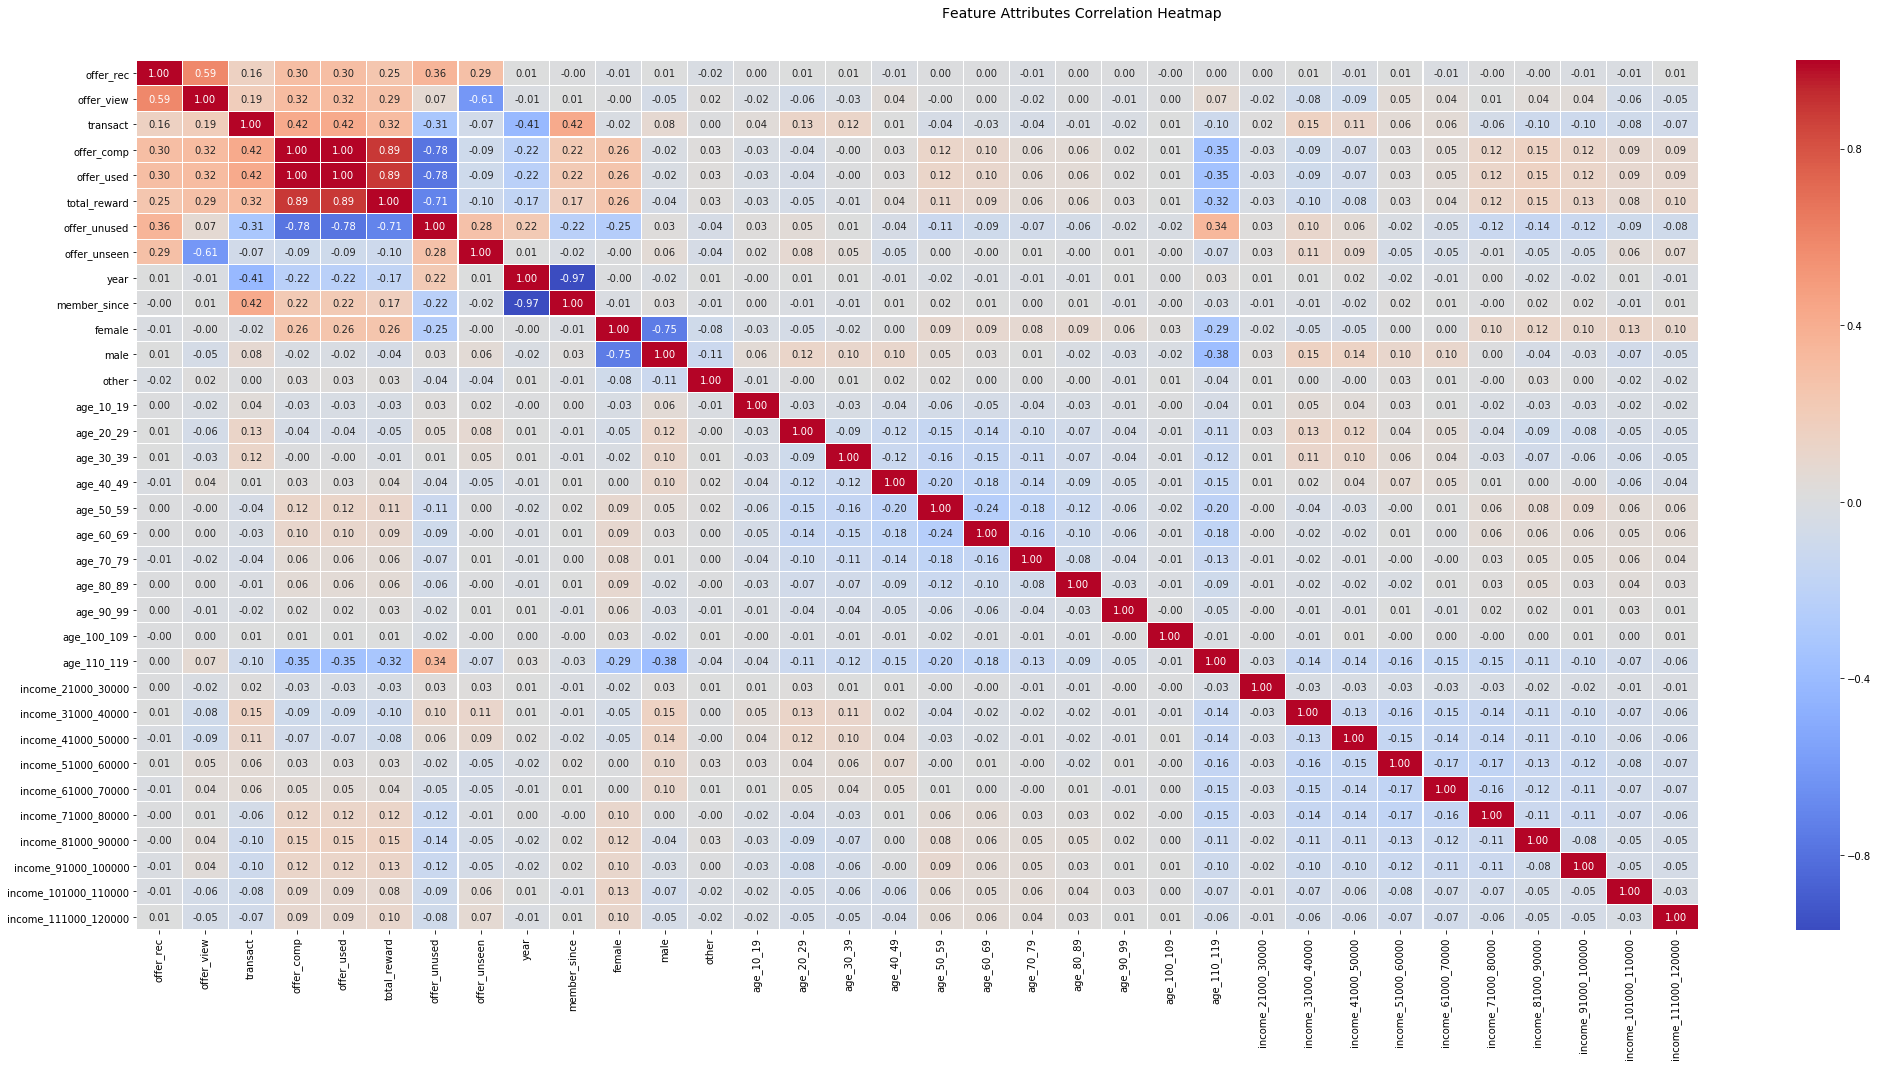

In [131]:
heatmap(features)

offer_comp, offer_used and total_reward columns are closely related. We will drop offer_comp and total_reward columns before feeding features into our machine learning model

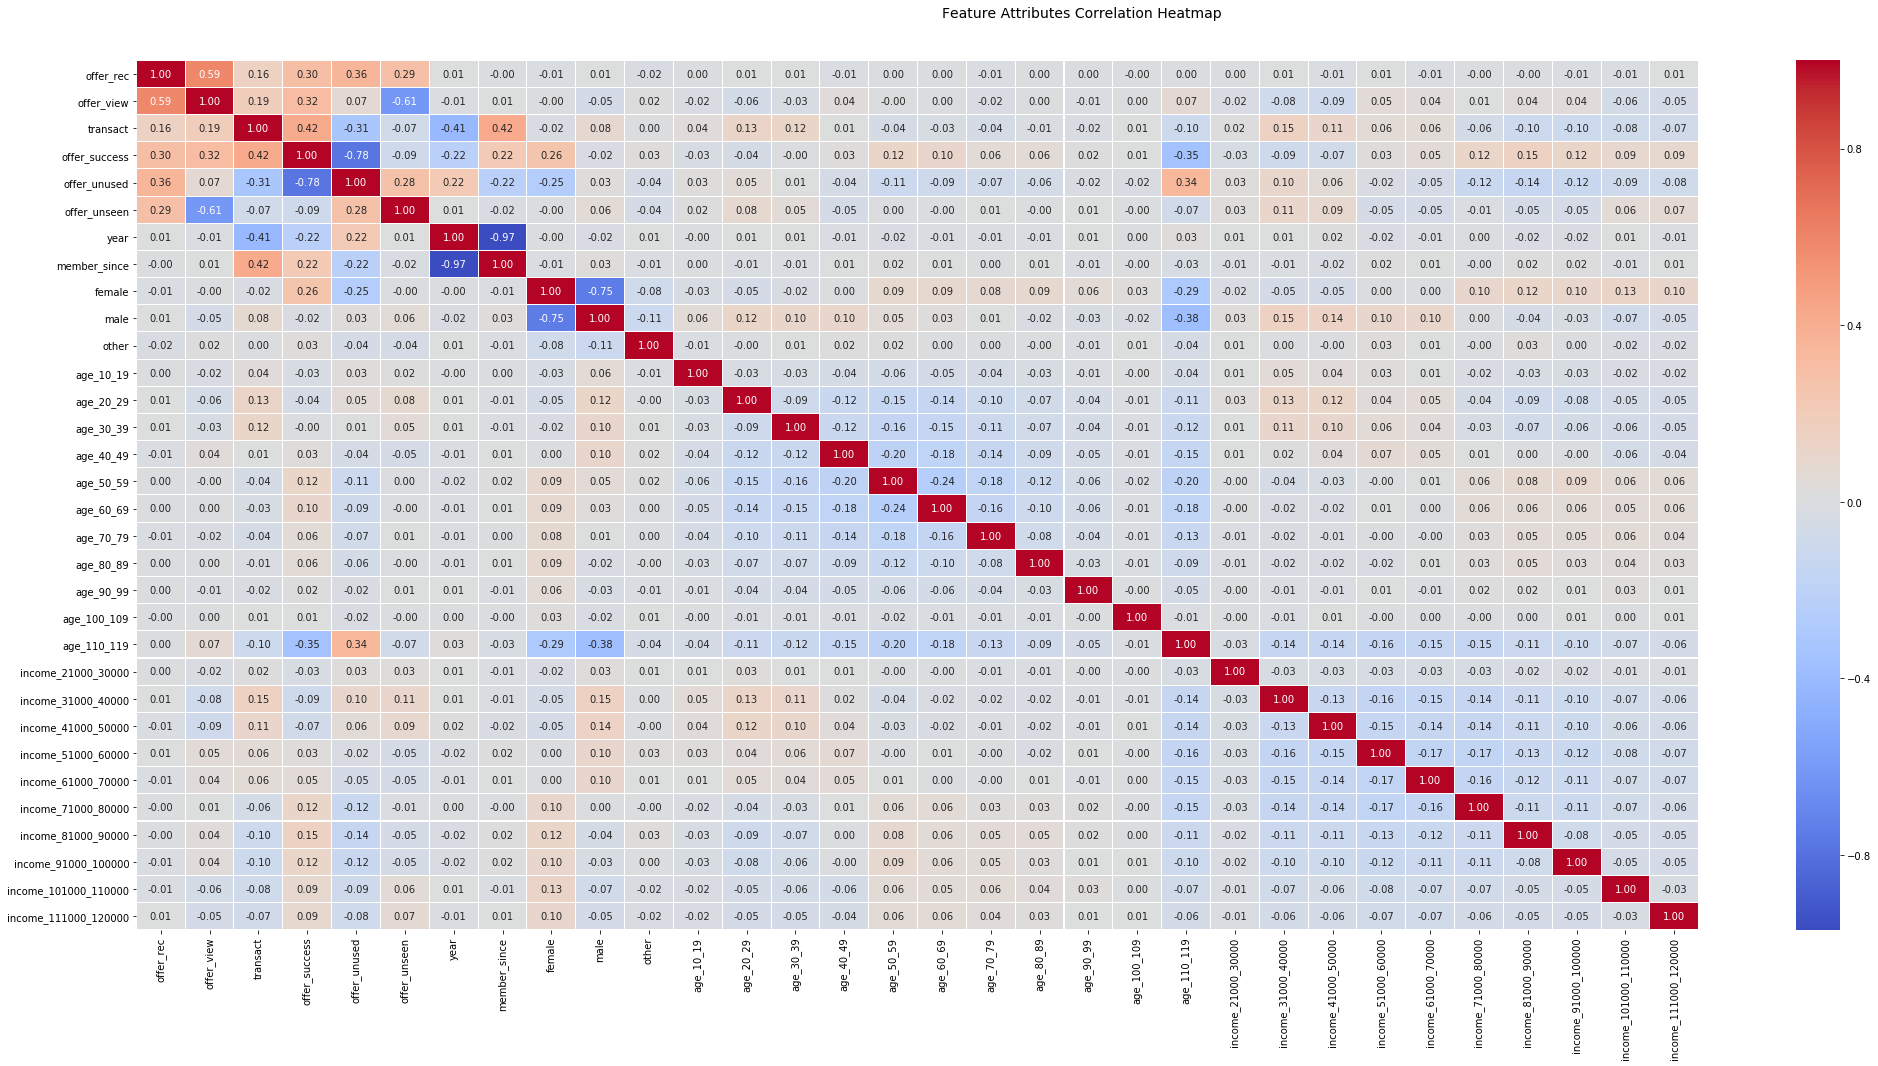

In [132]:
# drop offer_comp and total_reward column
features_train = features.drop(['offer_comp','total_reward'],axis=1)
features_train.rename(columns={'offer_used':'offer_success'},inplace=True)
heatmap(features_train)

### Create a function to process the ml dataset and return features and target

In [133]:
def ml_processing(ml_df,feat_cols,target_cols):
    '''
    This function converts a dataframe into featues,target for feeding 
    into machine learning models
    
    INPUT:
    merged_df: dataframe - with features and labels
    
    OUTPUT:
    X: dataframe -with columns to be used as features for ml models
    Y: dataframe - with columns to be used as target for ml models
    label: strings - target column names
    '''
    #target_cols = ['discount_20_10','discount_7_7','discount_10_7','discount_10_10','bogo_10_5','bogo_10_7','bogo_5_7','bogo_5_5']
    #features = clean_df.drop(target_cols,axis=1)
    #labels = clean_df[target_cols]
    #features.drop(['person','offer_comp','total_reward'],axis=1,inplace=True)
    #features_train = features
    features = ml_df[feat_cols]
    target = ml_df[target_cols]
    binarizer = Binarizer().fit(target)
    bin_target = binarizer.transform(target)
    X = features.values
    Y= bin_target
    label = target.columns
    return X, Y, label

In [134]:
global random_state
random_state = 42
global test_size
test_size = 0.2

### Create a function to split data into training and testing set

In [135]:
def split_data(X,Y,test_size,random_state):
    '''
    This function splits the data into training and test set given features,
    targets and test size
    
    INPUT:
    X: dataframe - features dataframe
    Y: dataframe - target dataframe
    test_size: int - the size for splitting into train and test set
    random_state: int 
    
    OUTPUT:
    X_train: training set
    X_test: testing set
    y_train: training targets    
    y_test: testing targets
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
    return X_train, X_test, y_train, y_test
    

### Create features and labels:

In [136]:
feat_cols_success = ['female', 'male', 'other','age_10_19', 'age_20_29',
       'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79',
       'age_80_89', 'age_90_99', 'age_100_109', 'age_110_119',
       'income_21000_30000', 'income_31000_40000', 'income_41000_50000',
       'income_51000_60000', 'income_61000_70000', 'income_71000_80000',
       'income_81000_90000', 'income_91000_100000', 'income_101000_110000',
       'income_111000_120000']
target_cols_success = ['offer_used'] 

### Split the data into training and testing set

In [137]:
X,Y,tg_label = ml_processing(ml_df,feat_cols_success,target_cols_success)
X_train,X_test,y_train,y_test = split_data(X,Y,test_size,random_state)

### Create a model

In [138]:
# Initialize RandomForest Classifier
clf = RandomForestClassifier(n_estimators=50,random_state=random_state)

# train the model
clf.fit(X_train,y_train)

# Make predictions on test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

### Model Evaluation:

For model evaluation we will use accuracy score as our targets are binary values.

In [139]:
# test our model
score_test = accuracy_score(y_test,y_pred_test)
score_train = accuracy_score(y_train,y_pred_train)
print('test score:   ',score_test)
print('train score:   ',score_train)

test score:    0.7964705882352942
train score:    0.784264705882353


We can observe that our model is not having a very great accuracy but is also not overfitting.

## Conclusion

We have analyzed the dataset and successfully created model for finding the best offer to send. Also we were able to build a ml model that can predict success of a offer with accuracy of close to 80 % with person's demographics